# Gaussian Processes Regression (GPR) in 1 dimension - a simple example

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

* This notebook provdies a simple code example to illustrate the workings of GP regression in 1d. 

* It is supplementary material to Section 4.2. of the paper [Machine Learning for Dynamic Incentive Problems](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3282487) by [P. Renner](https://www.lancaster.ac.uk/lums/people/philipp-renner), [S. Scheidegger](https://sites.google.com/site/simonscheidegger/home)

## Basic example in 1d

* We assume a zero mean GP Prior, and choose the hyperparamters of the GP manually. 

* For more details, see Rasmussen et al's (2005) book [Gaussian Processes](http://gaussianprocess.org/gpml/chapters/RW.pdf), and Murphy's (2012) book [Machine Learning: a Probabilistic Perspective](https://probml.github.io/pml-book/book0.html), chapter 15.

* We first choose is the true unknown, one-dimensional function we are trying to approximate.

In [2]:
f = lambda x: np.sin(0.9*x).flatten()

Next, we define the kernel function

In [3]:
def kernel_function(a, b):
    """ GP squared exponential kernel function """
    kernelParameter = 1.0
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

Now, here we choose then number of training and test data, and set the variance of the noise

In [4]:
N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

Next, we sample some input points and noisy versions of the function evaluated at these points 

In [5]:
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)  #add some noise

Now we follow [Murphy's (2012) book](https://probml.github.io/pml-book/book0.html), chapter 15, Algorithim 15 to obtain a numerically stable GPR.

In [6]:
K = kernel_function(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
TestPoint = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel_function(X, TestPoint))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel_function(TestPoint, TestPoint)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s =  np.sqrt(s2)

Next, we plot the true function, and compare it to the predictive mean of the GP. Furthermore, we display the uncertainty band (2 std) around it. 

(-5.0, 5.0, -3.0, 3.0)

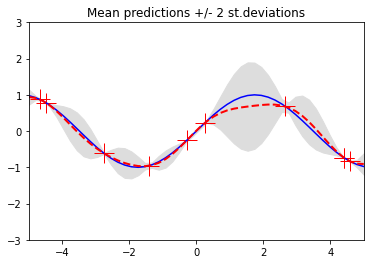

In [7]:
# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(TestPoint, f(TestPoint), 'b-')
pl.gca().fill_between(TestPoint.flat, mu-2*s, mu+2*s, color="#dddddd")
pl.plot(TestPoint, mu, 'r--', lw=2)
pl.savefig('draw_prediction.png', bbox_inches='tight')
pl.title('Mean predictions +/- 2 st.deviations')
pl.axis([-5, 5, -3, 3])